# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Read the CSV file

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-22-2022.csv"
df = pd.read_csv(url)

df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-02-23 04:21:09,33.93911,67.709953,172716,7569,NaN,NaN,Afghanistan,443.676755,4.382339
1,NaN,NaN,NaN,Albania,2022-02-23 04:21:09,41.15330,20.168300,270455,3451,NaN,NaN,Albania,9397.977622,1.275998
2,NaN,NaN,NaN,Algeria,2022-02-23 04:21:09,28.03390,1.659600,264365,6812,NaN,NaN,Algeria,602.870495,2.576740
3,NaN,NaN,NaN,Andorra,2022-02-23 04:21:09,42.50630,1.521800,37820,151,NaN,NaN,Andorra,48948.424254,0.399260
4,NaN,NaN,NaN,Angola,2022-02-23 04:21:09,-11.20270,17.873900,98671,1899,NaN,NaN,Angola,300.219666,1.924578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,NaN,NaN,Unknown,Ukraine,2022-02-23 04:21:09,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
4012,NaN,NaN,NaN,Nauru,2022-02-23 04:21:09,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000
4013,NaN,NaN,Niue,New Zealand,2022-02-23 04:21:09,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
4014,NaN,NaN,NaN,Tuvalu,2022-02-23 04:21:09,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [3]:
# View the first 5 rows
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-02-23 04:21:09,33.93911,67.709953,172716,7569,NaN,NaN,Afghanistan,443.676755,4.382339
1,NaN,NaN,NaN,Albania,2022-02-23 04:21:09,41.15330,20.168300,270455,3451,NaN,NaN,Albania,9397.977622,1.275998
2,NaN,NaN,NaN,Algeria,2022-02-23 04:21:09,28.03390,1.659600,264365,6812,NaN,NaN,Algeria,602.870495,2.576740
3,NaN,NaN,NaN,Andorra,2022-02-23 04:21:09,42.50630,1.521800,37820,151,NaN,NaN,Andorra,48948.424254,0.399260
4,NaN,NaN,NaN,Angola,2022-02-23 04:21:09,-11.20270,17.873900,98671,1899,NaN,NaN,Angola,300.219666,1.924578


#### Show the information of the dataset

In [4]:
# to print the full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3837 non-null   object 
 3   Country_Region       4016 non-null   object 
 4   Last_Update          4016 non-null   object 
 5   Lat                  3925 non-null   float64
 6   Long_                3925 non-null   float64
 7   Confirmed            4016 non-null   int64  
 8   Deaths               4016 non-null   int64  
 9   Recovered            6 non-null      float64
 10  Active               6 non-null      float64
 11  Combined_Key         4016 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3974 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.4+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
print(df.isnull().sum())

FIPS                    748
Admin2                  744
Province_State          179
Country_Region            0
Last_Update               0
Lat                      91
Long_                    91
Confirmed                 0
Deaths                    0
Recovered              4010
Active                 4010
Combined_Key              0
Incident_Rate            93
Case_Fatality_Ratio      42
dtype: int64


### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
 # read specific columns of csv file using Pandas
df[['Country_Region', 'Confirmed']]

,Country_Region,Confirmed
0,Afghanistan,172716
1,Albania,270455
2,Algeria,264365
3,Andorra,37820
4,Angola,98671
...,...,...
4011,Ukraine,0
4012,Nauru,0
4013,New Zealand,0
4014,Tuvalu,0


#### Show the number of Deaths by Country

In [7]:
 # read specific columns of csv file using Pandas
df[['Country_Region', 'Deaths']]

,Country_Region,Deaths
0,Afghanistan,7569
1,Albania,3451
2,Algeria,6812
3,Andorra,151
4,Angola,1899
...,...,...
4011,Ukraine,0
4012,Nauru,0
4013,New Zealand,0
4014,Tuvalu,0


#### Show the number of Recovered cases by Country

In [8]:
 # read specific columns of csv file using Pandas
df[['Country_Region', 'Recovered']]

,Country_Region,Recovered
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,NaN
3,Andorra,NaN
4,Angola,NaN
...,...,...
4011,Ukraine,0.0
4012,Nauru,0.0
4013,New Zealand,0.0
4014,Tuvalu,0.0


#### Show the number of Active Cases by Country

In [9]:
 # read specific columns of csv file using Pandas
df[['Country_Region', 'Active']]

,Country_Region,Active
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,NaN
3,Andorra,NaN
4,Angola,NaN
...,...,...
4011,Ukraine,0.0
4012,Nauru,0.0
4013,New Zealand,0.0
4014,Tuvalu,0.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [10]:
 # read specific columns of csv file using Pandas
df[['Country_Region', 'Confirmed','Deaths','Recovered','Active']]

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,172716,7569,NaN,NaN
1,Albania,270455,3451,NaN,NaN
2,Algeria,264365,6812,NaN,NaN
3,Andorra,37820,151,NaN,NaN
4,Angola,98671,1899,NaN,NaN
...,...,...,...,...,...
4011,Ukraine,0,0,0.0,0.0
4012,Nauru,0,0,0.0,0.0
4013,New Zealand,0,0,0.0,0.0
4014,Tuvalu,0,0,0.0,0.0


### Question 3

### Show the countries with no recovered cases

In [12]:
df[df['Recovered'] == 0][['Country_Region', 'Recovered']].drop_duplicates()

,Country_Region,Recovered
4010,"Korea, North",0.0
4011,Ukraine,0.0
4012,Nauru,0.0
4013,New Zealand,0.0
4014,Tuvalu,0.0
4015,United Kingdom,0.0


#### Show the countries with no confirmed cases

In [13]:
df[df['Confirmed'] == 0][['Country_Region', 'Confirmed']].drop_duplicates()

,Country_Region,Confirmed
79,Canada,0
176,Colombia,0
283,India,0
396,Malaysia,0
435,Mexico,0
636,Spain,0
726,US,0
3986,United Kingdom,0
4010,"Korea, North",0
4011,Ukraine,0


#### Show the countries with no deaths

In [14]:
df[df['Deaths'] == 0][['Country_Region', 'Deaths']].drop_duplicates()

,Country_Region,Deaths
5,Antarctica,0
24,Belgium,0
80,Canada,0
110,Chile,0
128,China,0
237,Germany,0
246,Holy See,0
283,India,0
358,Japan,0
396,Malaysia,0


In [15]:
(df[df['Deaths'] == 0]
    .groupby('Country_Region', as_index=False)[['Confirmed', 'Deaths', 'Recovered']]
    .agg({
        'Confirmed': np.sum,
        'Deaths': np.sum,
        'Recovered': np.sum
    }))

,Country_Region,Confirmed,Deaths,Recovered
0,Antarctica,11,0,0.0
1,Belgium,3468499,0,0.0
2,Canada,26,0,0.0
3,Chile,44,0,0.0
4,China,16977,0,0.0
5,Germany,52716,0,0.0
6,Holy See,29,0,0.0
7,India,0,0,0.0
8,Japan,8,0,0.0
9,"Korea, North",0,0,0.0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [21]:
# Group by 'Country_Region' and aggregate the desired columns
top_countries_confirmed = df.groupby('Country_Region').agg({
    'Last_Update': 'first',  # or 'max' depending on what you want
    'Confirmed': 'sum',
    'Recovered': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Sort by 'Confirmed' cases and pick the top 10
result_confirmed = top_countries_confirmed.sort_values(by='Confirmed', ascending=False).head(10)

# Display the desired columns in the specified order
result_confirmed = result_confirmed[['Last_Update', 'Country_Region', 'Confirmed', 'Recovered', 'Deaths']]

result_confirmed


,Last_Update,Country_Region,Confirmed,Recovered,Deaths
186,2022-02-23 04:21:09,US,78794717,0.0,939072
80,2022-02-23 04:21:09,India,42867031,0.0,512622
24,2022-02-23 04:21:09,Brazil,28361951,0.0,645735
63,2022-02-23 04:21:09,France,22563594,0.0,138277
190,2022-02-23 04:21:09,United Kingdom,18826968,0.0,187880
147,2022-02-23 04:21:09,Russia,15430540,0.0,340101
67,2022-02-23 04:21:09,Germany,13815611,0.0,121603
184,2022-02-23 04:21:09,Turkey,13675581,0.0,92990
86,2022-02-23 04:21:09,Italy,12554596,0.0,153512
167,2022-02-23 04:21:09,Spain,10880193,0.0,98635


#### Show the Top 10 Countries with Active cases

In [22]:
# Group by 'Country_Region' and aggregate the desired columns
top_countries_confirmed = df.groupby('Country_Region').agg({
    'Last_Update': 'first',  # or 'max' depending on what you want
    'Confirmed': 'sum',
    'Recovered': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Sort by 'Confirmed' cases and pick the top 10
top_10_confirmed = top_countries_confirmed.sort_values(by='Confirmed', ascending=False).head(10)

# Display the desired columns in the specified order
top_10_display = top_10_confirmed[['Last_Update', 'Country_Region', 'Confirmed', 'Recovered', 'Deaths']]
top_10_display


,Last_Update,Country_Region,Confirmed,Recovered,Deaths
186,2022-02-23 04:21:09,US,78794717,0.0,939072
80,2022-02-23 04:21:09,India,42867031,0.0,512622
24,2022-02-23 04:21:09,Brazil,28361951,0.0,645735
63,2022-02-23 04:21:09,France,22563594,0.0,138277
190,2022-02-23 04:21:09,United Kingdom,18826968,0.0,187880
147,2022-02-23 04:21:09,Russia,15430540,0.0,340101
67,2022-02-23 04:21:09,Germany,13815611,0.0,121603
184,2022-02-23 04:21:09,Turkey,13675581,0.0,92990
86,2022-02-23 04:21:09,Italy,12554596,0.0,153512
167,2022-02-23 04:21:09,Spain,10880193,0.0,98635


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [23]:
import matplotlib.pyplot as plt

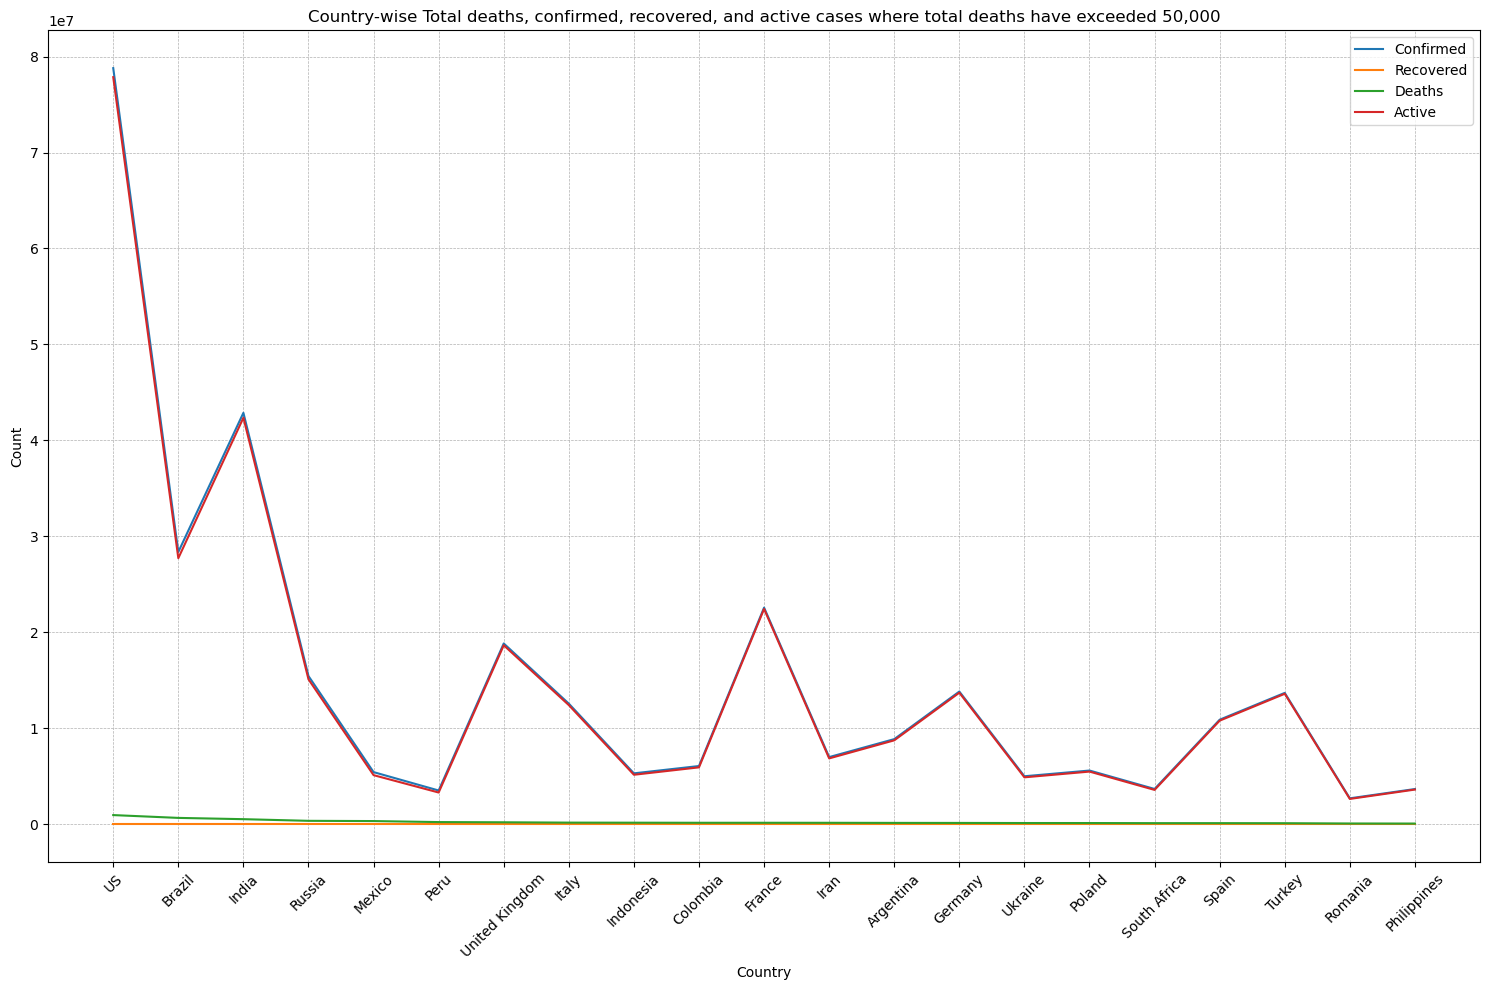

In [25]:
# Load the dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-22-2022.csv"
df = pd.read_csv(url)

# Group by 'Country_Region' and aggregate the columns of interest
agg_data = df.groupby('Country_Region').agg({
    'Confirmed': 'sum',
    'Recovered': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Calculate 'Active' cases
agg_data['Active'] = agg_data['Confirmed'] - (agg_data['Deaths'] + agg_data['Recovered'])

# Filter countries where deaths > 50,000
filtered_data = agg_data[agg_data['Deaths'] > 50000]

# Sort by 'Deaths' for better visualization
filtered_data = filtered_data.sort_values(by='Deaths', ascending=False)

# Plotting line graph
plt.figure(figsize=(15, 10))
for column in ['Confirmed', 'Recovered', 'Deaths', 'Active']:
    plt.plot(filtered_data['Country_Region'], filtered_data[column], marker='', label=column)

plt.title('Country-wise Total deaths, confirmed, recovered, and active cases where total deaths have exceeded 50,000')
plt.ylabel('Count')
plt.xlabel('Country')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [56]:
import plotly.express as px

In [57]:
df= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [58]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [59]:
# Filter the data for USA and group by 'Province_State' to aggregate the sum
df_covid_data_mask = (df['Country_Region'] == 'US')
df_covid_active = df[df_covid_data_mask].groupby('Province_State').sum().reset_index()

# Generate the bar chart using plotly.express
fig = px.bar(df_covid_active, y='Active', x='Province_State', text='Active', text_auto='.2s',
            title="State wise Active cases of COVID-19 in USA")

# Adjusting the display of text inside the bars
fig.update_traces(texttemplate='%{text}', textposition='inside', textfont_color='white')

# Show the plot
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [60]:
# filter the data
df_covid_active_mask = (df['Country_Region'] == 'US')
df_covid_active = df[df_covid_active_mask].groupby('Province_State').sum().reset_index()

# Create the grouped bar chart
fig = px.bar(df_covid_active, x='Province_State', y='Active',
             title="State wise active cases of COVID-19 in USA")
fig.show()


### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [61]:
# filter the data
df_covid_active_mask = (covid_data['Country_Region'] == 'US')
df_covid_combine = covid_data[df_covid_active_mask].groupby('Province_State').sum().reset_index()

# Create the grouped bar chart
fig = px.bar(df_covid_combine, 
             x='Province_State', 
             y=['Active', 'Confirmed', 'Recovered', 'Deaths'], 
             # color='Cases', 
             barmode='group',
             title='USA state wise combine number of confirmed, recovered, active, and deaths covid-19 cases')
fig.update_layout(yaxis_title="Counts",
                  legend_title_text='Cases')
# Show the plot
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [62]:
import plotly.express as px
import plotly.io as pio

In [63]:
# Read each CSV file into DataFrame and filter the data
# df_covid_days = pd.concat(map(pd.read_csv, glob.glob('covid_data/*.csv')))
df_covid_grouped = covid_data.groupby(['Last_Update'])
df_covid_days = (df_covid_grouped.agg({
                    'Confirmed': np.sum
                })
                 .sort_values(by='Last_Update')
                 .reset_index())
df_covid_days[['Last_Update', 'Confirmed']]

# plot the line
fig = px.line(df_covid_days, 
              x='Last_Update', 
              y='Confirmed', 
              markers=True,
              title="Worldwide Confirmed Coronavirus(COVID-19) Cases Over Time")
# Show the plot
fig.show()